In [37]:
import nltk
from nltk.corpus import gutenberg
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize

In [38]:
words = gutenberg.words('milton-paradise.txt')

In [39]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(lemmatized_words)

top_words = word_counts.most_common(20)

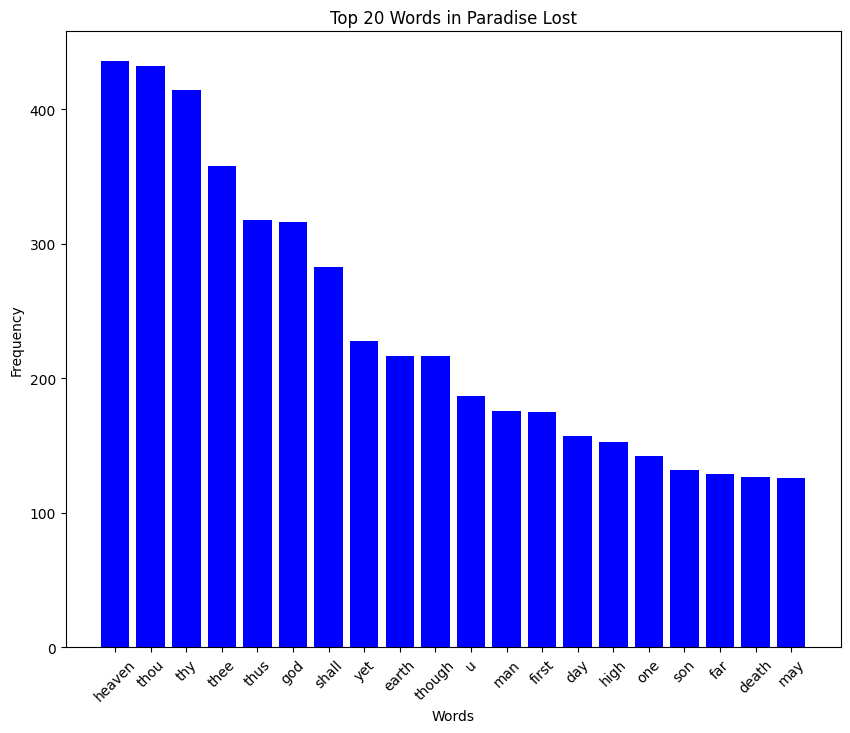

In [43]:
plt.figure(figsize=(10, 8))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Paradise Lost')
plt.xticks(rotation=45)
plt.show()

Question2.	Perform Vader Sentiment Analysis on the book.

In [41]:
text = gutenberg.raw('milton-paradise.txt')

sentences = sent_tokenize(text)

sia = SentimentIntensityAnalyzer()

sentiment_scores = [(sentence, sia.polarity_scores(sentence)) for sentence in sentences]

sentiment_scores.sort(key=lambda x: x[1]['compound'])

most_negative = sentiment_scores[:5]

most_positive = sentiment_scores[-5:]

most_neutral = sorted(sentiment_scores, key=lambda x: abs(x[1]['compound']))[:5]

print("Most Negative Sentences:")
for sentence in most_negative:
    print(sentence)

print("\nMost Positive Sentences:")
for sentence in most_positive:
    print(sentence)

print("\nMost Neutral Sentences:")
for sentence in most_neutral:
    print(sentence)

Most Negative Sentences:
("For this he shall live hated, be blasphemed, \nSeised on by force, judged, and to death condemned \nA shameful and accursed, nailed to the cross \nBy his own nation; slain for bringing life: \nBut to the cross he nails thy enemies, \nThe law that is against thee, and the sins \nOf all mankind, with him there crucified, \nNever to hurt them more who rightly trust \nIn this his satisfaction; so he dies, \nBut soon revives; Death over him no power \nShall long usurp; ere the third dawning light \nReturn, the stars of morn shall see him rise \nOut of his grave, fresh as the dawning light, \nThy ransom paid, which Man from death redeems, \nHis death for Man, as many as offered life \nNeglect not, and the benefit embrace \nBy faith not void of works:  This God-like act \nAnnuls thy doom, the death thou shouldest have died, \nIn sin for ever lost from life; this act \nShall bruise the head of Satan, crush his strength, \nDefeating Sin and Death, his two main arms; \

Question3.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

The VADER sentiment tool accurately identified the most negative, positive, and neutral sentences when applied to the sentences from Paradise Lost. This is achieved through sensitivity to both the types of lexical content in the sentence and the emotive sentiment of the words used.

Negative Sentences: Yes, the scores are correct. The selected sentences contain words and themes associated with negativity, such as death, doom, and suffering, which VADER accurately scores as highly negative.

Positive Sentences: Yes, these scores are also correct. The sentences are rich in words that evoke positivity, like beauty, divine acts, and creation, leading to high positive scores.

Neutral Sentences: Yes, these scores are correct. The sentences lack significant positive or negative sentiment, fitting the neutral scores assigned.

VADER uses a lexicon of positive and negative indicators which would align well with straightforward expressions of emotion and sentiment. Therefore, the presence of explicitly negative and positive words see the VADER tool score the negative and positive sentences effectively. Furthermore, in the neutral sentences, there is a complete lack of this emotional language which allows the VADER tool to effectively score this data close to zero indicating a severe lack of sentiment.

Question4. create a word cloud for your results from question 1 

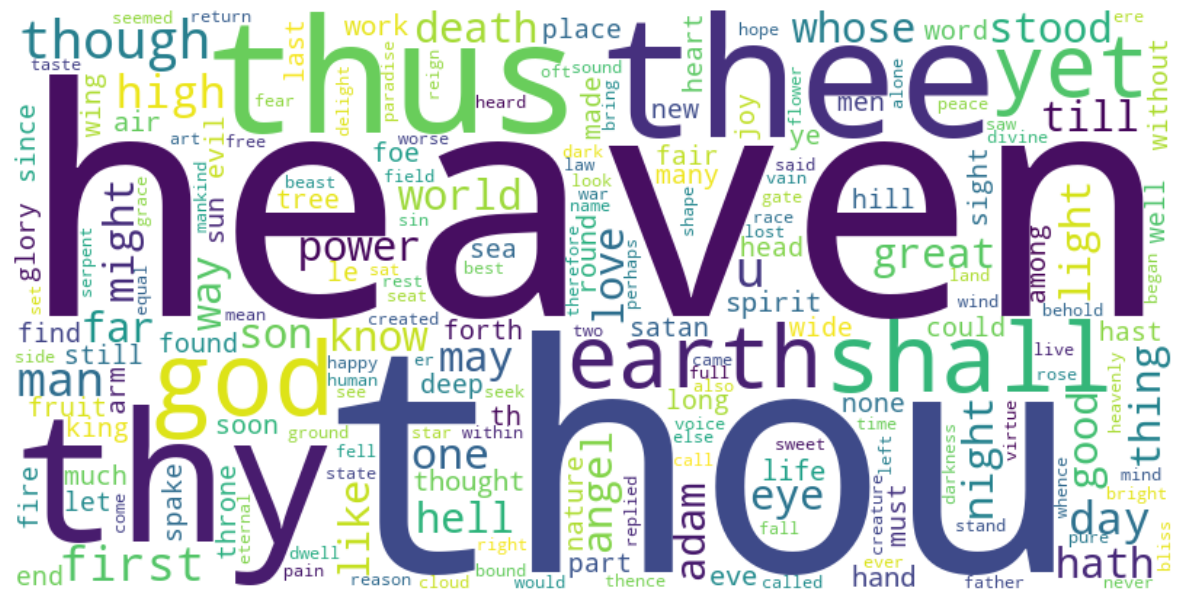

In [42]:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()